### Bengaluru_House_Rate_prediction

#### About this file

What are the things that a potential home buyer considers before purchasing a house? **The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence**? What about the most important factor — **the price**?

Now with the lingering impact of demonetization, the enforcement of the Real Estate (Regulation and Development) Act (RERA), and the lack of trust in property developers in the city, housing units sold across India in 2017 dropped by 7 percent. In fact, the property prices in Bengaluru fell by almost 5 percent in the second half of 2017, said a study published by property consultancy Knight Frank.
For example, for a potential homeowner, over 9,000 apartment projects and flats for sale are available in the range of ₹42-52 lakh, followed by over 7,100 apartments that are in the ₹52-62 lakh budget segment, says a report by property website Makaan. According to the study, there are over 5,000 projects in the ₹15-25 lakh budget segment followed by those in the ₹34-43 lakh budget category.

Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.

dataset link : https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [1]:
## importing all necessary libraries..
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
## Load the dataset..
df = pd.read_csv('Bengaluru_House_Dataset.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


###  Exploratory Data Analysis / Data preprocessing
    Data Analysis Phase 
    Main Aim is to undestand more about the data

In [3]:
print('data shape : ',df.shape)
print(df.describe())
## note : price have outlier 3600

data shape :  (13320, 9)
               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000


#### In Data Analysis We will Analysis to Find out the below stuff
Missing Values, All the Numerical variables, Distribution of the Numerical Variables , Categorical Variable, Cardinality of Categorical Variable
Outliers, Relationship between independent and dependent feature(SalePrice)

In [4]:
## Missing values

# for i in df.columns:
#     if df[i].isnull().sum()>=1:
#         print(i)

## 1 -step make the list of feature which has missing values 
feature_na = [i for i in df.columns if df[i].isnull().sum()>=1]
print(feature_na)

## 2 -step print the feature name and the percentage of the missing values
for i in feature_na:
    print(i, np.round(df[i].isnull().mean(),4), '% missing values')
    
# note : print the feature with null value in percentage 
## So according to this 41% values are missing in society... so we drop 

['location', 'size', 'society', 'bath', 'balcony']
location 0.0001 % missing values
size 0.0012 % missing values
society 0.4131 % missing values
bath 0.0055 % missing values
balcony 0.0457 % missing values


In [5]:
# check the how many area_types
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
# check the availability group 
df.groupby('availability')['availability'].agg('count')

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
15-Nov                      2
15-Oct                      2
16-Dec                      4
16-Jan                      1
16-Jul                      1
16-Mar                      3
16-Nov                      1
16-Oct                      1
16-Sep                      2
17-Apr                      7
17-Aug                      9
17-Dec                     29
17-Feb                      2
17-Jan                      1
17-Jul                     12
17-Jun                     13
17-Mar                      5
17-May                      8
17-Nov                     12
17-Oct                     21
17-Sep                     11
18-Apr                    271
18-Aug                    200
18-Dec                    307
18-Feb                     62
                        ...  
20-Aug                     16
20-Dec                     

In [7]:
## check how many group in size column
df.groupby('size')['size'].agg('count')

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

In [8]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
### Drop the society column
df = df.drop(columns=['society'],axis=0)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


## data cleaning process

In [10]:
## find the null values
df.isnull().sum()
## so we replace the balcony and bath to median values 

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [11]:
## bath fill by its median value..
df['bath'].fillna(df.bath.median(),inplace=True)

In [12]:
## bath fill by its median value
df['balcony'].fillna(df.balcony.median(),inplace=True)

In [13]:
### drop the size and location na value.. rows --> 13320 - 17 = 13320 not impact the much the dataset..
df.dropna(inplace=True)

In [14]:
df.isnull().sum()
## now NO value are null in the dataset...

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [15]:
## check the diffrent value 
print(df.area_type.unique())
print(df.availability.unique())
print(df.location.unique())
print(df.total_sqft.unique())
print(df.bath.unique())
print(df.balcony.unique())
print(df.price.unique())
## all the value are the good just the total_sqrt have a problem '1133 - 1384' and lableing need so we hendle it

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' '19-May' '17-Nov' '20-Oct' '20-Jun' '19-Feb'
 '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May' '19-Oct' '21-Jul' '21-Nov'
 '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep' '21-Aug' '14-Nov' '19-Nov'
 '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov' '20-Jul' '16-Sep' '15-Oct'
 '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan' '16-Nov' '20-Apr' '16-Jan'
 '14-Jul']
['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']
['1056' '2600' '1440' ... '1133 - 138

In [16]:
## check that how many value are these types..
def check_value(val):
    try:
        if float(val):
            return True
    except Exception:
        return False

In [17]:
df[~df.total_sqft.apply(check_value)].head()
## 239 rows are these type so we solve this problem by "add(2100 , 2850)/2"

,area_type,availability,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,3010 - 3410,2.0,2.0,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,2957 - 3450,2.0,2.0,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005


In [18]:
## conert total_sqrt to in single values..
def convert_value(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
#check the value are converted 
df.total_sqft = df.total_sqft.apply(convert_value)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [20]:
## Now in size column remove the BHK and rename as BHK 
df['bhk'] = df['size'].apply(lambda x: int(x.split()[0]))
df.drop(columns=['size'],inplace=True)
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2


In [21]:
## check any null value
df.isnull().sum()
## drop these null values

area_type        0
availability     0
location         0
total_sqft      46
bath             0
balcony          0
price            0
bhk              0
dtype: int64

In [22]:
## now all the null values are removed..
df.dropna(inplace=True)

### Feature Engineerning

In [23]:
### In the dataset set the price are given in Lac so we add the column for per-square price 
df['per_square_price'] = (df['price']*100000)/df['total_sqft']
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,per_square_price
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [24]:
### Now in location column we have multiple values by check the unique()  
len(df.location.unique())

1298

In [25]:
## check that how many location is have less then 10 time occure
location_st = df.groupby('location')['location'].count().sort_values()
print(location_st)

print(len(location_st[location_st<=10]), len(df.location.unique()))
## which have less then 10 value assign them location = 'Other'

location
 Anekal                                           1
Kengeri Satellite Town KHB Apartment              1
Kengeri Satellite Town Stage II                   1
Kirloskar layout, Basaveshwarnagar                1
Kodanda Reddy Layout                              1
Konappana Agrahara                                1
Kudlu Village,                                    1
Kumbhena Agrahara                                 1
Kuvempu Layout                                    1
LIC Colony                                        1
Lakkasandra Extension                             1
Lakshminarayanapura, Electronic City Phase 2      1
Lakshmipura Vidyaanyapura                         1
Lalbagh Road                                      1
Laxminarayana Layout                              1
M C Layout                                        1
M.G Road                                          1
MEI layout, Bagalgunte                            1
Kengeri Satellite Town ( BDA SITE)                1
Ken

In [26]:
## lableling the lessthen 10 is other
location_less_10 = location_st[location_st<=10]
df['location'] = df.location.apply(lambda x: 'other' if x in location_less_10 else x)
len(df.location.unique())

241

In [27]:
## now check the availability column 
availability_lst = df.groupby('availability')['availability'].count().sort_values()  
# 10541 value are ready to move and other give date so all date we convert into Not ready...
df['availability'] = df.availability.apply(lambda x: 'Not Ready To Move' if x != 'Ready To Move' else x)

In [28]:
## check the availability values
print(len(df.availability.unique()))
df.head()

2


,area_type,availability,location,total_sqft,bath,balcony,price,bhk,per_square_price
0,Super built-up Area,Not Ready To Move,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


### Outliers Handling

In [29]:
### just figureOut the outliers
df.describe()
## we can see that in total_sqft, bath, bhk,  price==per_square_price   have outliers

,total_sqft,bath,balcony,price,bhk,per_square_price
count,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,1.325700e+04
mean,1558.809175,2.688165,1.604058,112.471981,2.802670,7.912825e+03
std,1238.478935,1.336799,0.802958,149.092716,1.292117,1.064976e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.271186e+03
50%,1275.000000,2.000000,2.000000,72.000000,3.000000,5.438596e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.313318e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


<IPython.core.display.Javascript object>

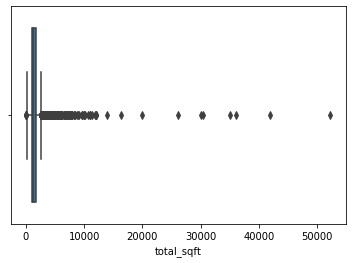

<IPython.core.display.Javascript object>

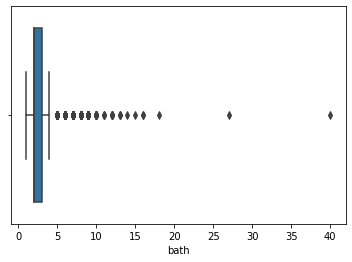

<IPython.core.display.Javascript object>

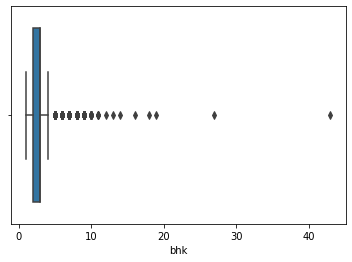

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

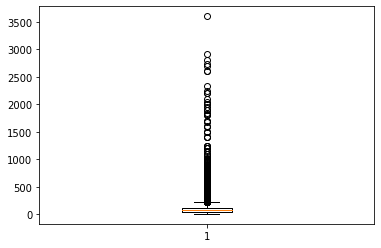

In [30]:
## see the outliers by using the boxplot
sns.boxplot(x='total_sqft',data=df)
plt.show()
sns.boxplot(x = df.bath)
plt.show()
sns.boxplot(df['bhk'])
plt.show()
plt.boxplot(df['price'])
plt.show()

In [31]:
## out of this amount all are the outliers
### all outlier for maximum values
## 0.95 is a threshold value genreeally we used but it's also depend on the datasets..
print(df.total_sqft.quantile(0.95)) 
print(df.bath.quantile(0.95))
print(df.bhk.quantile(0.95))
print(df.per_square_price.quantile(0.95))
#### just out of thers we can remove ....
## we used diffrent technique...ok

3250.0
5.0
5.0
15290.754622688637


In [32]:
### you can also check the minimum, maximum threshold value
min_threshold, max_threshold = df.bath.quantile([0.001,0.950])
min_threshold,max_threshold
## If you don't know the minimum outliers is less then or greater then then use this so find the minimum and maximum values

(1.0, 5.0)

In [33]:
### you can also check the minimum, maximum threshold value
min_threshold_bhk, max_threshold_bhk = df.bhk.quantile([0.001,0.950])
min_threshold_bhk,max_threshold_bhk
## If you don't know the minimum outliers is less then or greater then then use this so find the minimum and maximum values

(1.0, 5.0)

In [34]:
# note: So minimum is accepted.. maximum reduce
df1 = df[df.bath < max_threshold]
df2 = df1[df1.bhk < max_threshold_bhk]
df2.shape

(12029, 9)

In [35]:
## check the df2 description for having outliers 
df2.describe()
### Now per_square_price, total_sqft, having the outliers.. 

,total_sqft,bath,balcony,price,bhk,per_square_price
count,12029.000000,12029.000000,12029.000000,12029.000000,12029.000000,1.202900e+04
mean,1452.346815,2.382575,1.584504,94.575967,2.521739,7.261160e+03
std,1039.875524,0.738361,0.788139,101.624705,0.730219,1.096542e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1096.000000,2.000000,1.000000,48.000000,2.000000,4.199725e+03
50%,1255.000000,2.000000,2.000000,67.000000,2.000000,5.251397e+03
75%,1600.000000,3.000000,2.000000,102.000000,3.000000,6.797583e+03
max,52272.000000,4.000000,3.000000,2600.000000,4.000000,1.200000e+07


In [36]:
### you can also check the minimum, maximum threshold value
min_threshold, max_threshold = df.per_square_price.quantile([0.05,0.95])
min_threshold,max_threshold
## If you don't know the minimum outliers is less then or greater then then use this so find the minimum and maximum values

(3111.0297855037106, 15290.754622688637)

In [37]:
## remove the outliers because I check df[df2.per_square_price<min_threshold] it give very low values ans same for max_threshold
df3 = df2[(df2.per_square_price<max_threshold) & (df2.per_square_price>min_threshold)]

In [38]:
## check for the total_sqrt Outliers
min_threshold, max_threshold = df3.total_sqft.quantile([0.05,0.95])
min_threshold,max_threshold

(702.0, 2559.75)

In [39]:
## remove the outliers
df4 = df3[(df3.total_sqft<max_threshold) & (df3.total_sqft>min_threshold)]

In [40]:
## Now check any Outliers in the dataset
df4.describe()

,total_sqft,bath,balcony,price,bhk,per_square_price
count,9921.000000,9921.000000,9921.000000,9921.000000,9921.000000,9921.000000
mean,1367.613866,2.369217,1.623929,80.510068,2.507308,5726.179385
std,358.142426,0.617826,0.768972,44.156150,0.611196,2098.359087
min,703.000000,1.000000,0.000000,23.650000,1.000000,3111.111111
25%,1125.000000,2.000000,1.000000,50.750000,2.000000,4281.657713
50%,1270.000000,2.000000,2.000000,67.770000,2.000000,5212.765957
75%,1566.000000,3.000000,2.000000,95.000000,3.000000,6515.301086
max,2559.000000,4.000000,3.000000,368.000000,4.000000,15090.909091


### Model Building

In [41]:
## now we can use as a target value as Price or per_square_price so fro we remove the price column
df5 = df4.drop(columns=['per_square_price'],axis=0)
df5.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Not Ready To Move,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2
5,Super built-up Area,Ready To Move,Whitefield,1170.0,2.0,1.0,38.00,2


In [42]:
# Converting the categorical_value into numerical_values using get_dummies method
area_type = pd.get_dummies(df5['area_type'],drop_first=True)
df5 = df5.drop('area_type',axis=1)
area_type.head()

,Carpet Area,Plot Area,Super built-up Area
0,0,0,1
2,0,0,0
3,0,0,1
4,0,0,1
5,0,0,1


In [43]:
# Converting the categorical_value into numerical_values using get_dummies method
availability = pd.get_dummies(df5['availability'],drop_first=True)
df5 = df5.drop('availability',axis=1)
availability.head()

,Ready To Move
0,0
2,1
3,1
4,1
5,1


In [44]:
# Converting the categorical_value into numerical_values using get_dummies method
location = pd.get_dummies(df5['location'],drop_first=True)
df5 = df5.drop('location',axis=1)
location.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [45]:
# Now Concat the area_type,location,availability
df5 = pd.concat([df5,area_type,location,availability],axis=1)

In [46]:
# Splitting the dataset into features and label
X = df5.drop('price', axis='columns')
y = df5['price']

In [47]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [48]:
## use the RandomForestRegressor algorithm
from sklearn.ensemble import RandomForestRegressor

In [49]:
## Model Training
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [50]:
## Model prediction
y_pred = model.predict(X_test)

In [51]:
### Check the accuracy
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('mean_absolute_error : ', np.round(mean_absolute_error(y_test,y_pred),4))
print('mean_squared_error : ', np.round(mean_squared_error(y_test,y_pred),4))
print('Square_root_mean_squared_error : ', np.round(np.sqrt(mean_squared_error(y_test,y_pred)),4))

mean_absolute_error :  14.4124
mean_squared_error :  542.7606
Square_root_mean_squared_error :  23.2972


In [52]:
#### accuracy of the model
model.score(X,y)

0.8988313230352097

**Since the Accuracy of the RandomForestRegressor model is good..**

### Predicting the values using our trained model

In [53]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area', '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout',
       ...
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield', 'Yelachenahalli',
       'Yelahanka', 'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur',
       'other', 'Ready To Move'],
      dtype='object', length=248)

In [54]:
# For finding the appropriate location
np.where(X.columns=='Electronic City Phase II')[0][0]

85

In [55]:
# For finding the appropriate area_type
np.where(X.columns=='Plot  Area')[0][0]

5

In [56]:
# For finding the appropriate availability
np.where(X.columns=='Ready To Move')[0][0]

247

In [57]:
## check which location is drop by dummy variable
# for i in df4.location.unique():
#     print(i)
#     print(np.where(X.columns==i)[0][0])

In [58]:
# Creating a fuction to predict values
def prediction(location, bhk, bath, balcony, sqft, area_type, availability):
    
    loc_index, area_index, avail_index = -1,-1,-1
        
    if location!='Devarachikkanahalli':
        loc_index = int(np.where(X.columns==location)[0][0])
    
    if area_type!='built-up  Area':
        area_index = np.where(X.columns==area_type)[0][0]
        
    if availability!='Not Ready':        
        avail_index = np.where(X.columns==availability)[0][0]
            
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    
    if loc_index >= 0:
        x[loc_index] = 1
    if area_index >= 0:
        x[area_index] = 1
    if avail_index >= 0:
        x[avail_index] = 1
        
    return model.predict([x])[0]

In [59]:
# Prediction 1
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
print(prediction('Electronic City Phase II', 2, 2, 2, 1000, 'Plot  Area', 'Ready To Move'),"LAC")

57.78 LAC


In [60]:
# Prediction 2
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
print(np.round(prediction('1st Phase JP Nagar', 2, 3, 2, 1000, 'Super built-up  Area', 'Ready To Move'),2),"LAC")

76.65 LAC


In [61]:
# Prediction 3
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
print(np.round(prediction('1st Phase JP Nagar', 3, 2, 2, 1000, 'Plot  Area', 'Ready To Move'),2),"LAC")

99.08 LAC


In [62]:
### Done